# Introduction 🌟

Diabetes is a chronic condition that affects millions of people worldwide. It occurs commonly when you age, build excessive amount of body mass, family history, or even some risk factors. The objective of this project is to develop a predictive model that can be used in health centers, clinics, and hospitals to correctly evaluate each patient whether he or she is diabetic, or non-diabetic based on the patient record that consists of multiple features including age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level.

The predictive model will be created via the power of machine learning to accurately categorize each patient based on his or her medical record.

## 1. Metadata

The metadata will help as understand the available features in the dataset:

Age: Age refers to the length of time that a patient have lived.
Gender: The patient gender.

Body Mass Index (BMI): Calculated using height and weight. Higher BMI can increase the risk of developing diabetes.

Hypertension: A medical condition that consist of high blood pressure, 0 for absence and 1 for presence.

Heart Disease: A medical condition that is associated with an increase risk of developing diabetes, 0 for absence and 1 for presence.

Smoking History: Patient smoking status.

HbA1c Level: HbA1c (Hemoglobin A1c) level is a measure of a person’s average blood sugar level over the past 2-3 months. Higher HbA1c can increase the risk of developing diabetes.

Blood Glucose Level: Glucose level in the patient blood stream.
Diabetes: A chronic condition where the body struggles to regulate blood sugar, 0 for absence and 1 for presence.


## Import libraries

In [1]:
#data manipulation libraries
import pandas as pd
import numpy as np

#visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#remove warnings
import warnings
warnings.filterwarnings("ignore")

#imbalanced to balanced
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

## Loading Data

In [2]:
# reading the  dataset

df = pd.read_csv("diabetes.csv")

#overview of the dataset
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## Data Cleaning

## Dataframe Shape

In [3]:
# what is the number of record and features we got?

print(f'Number of Records: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

Number of Records: 768
Number of Features: 9


## Basic information of the data

In [4]:
#chech basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Missing Values of Data

In [5]:
# chack for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Descriptive Statistics

In [6]:
# check for descriptive statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Chack Duplicated data

In [7]:
dp = df.duplicated().sum()

print("Duplicate Value is :- ",dp)

Duplicate Value is :-  0


### Check records of children under 10 years old

In [8]:
#chack a records we have of infants smaller than 6 months ?

f_df = df.query('Age < 10')

print("10 Years old children records")
print(f'Number of Records :- {df.shape[0]}')

10 Years old children records
Number of Records :- 768


### 7. unique values

In [9]:
# chach a unique values

for i in df.columns:
    print(f'The unique values for the feature {i} are:')
    print(f'{df[i].unique()} total is :- {df[i].nunique()}')
    print('\n--------------------\n')

The unique values for the feature Pregnancies are:
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14] total is :- 17

--------------------

The unique values for the feature Glucose are:
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190] total is :- 136

--------------------

The unique values for the feature BloodPressure are:
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102

### Data Visualization (EDA)

#### Histogram of Age

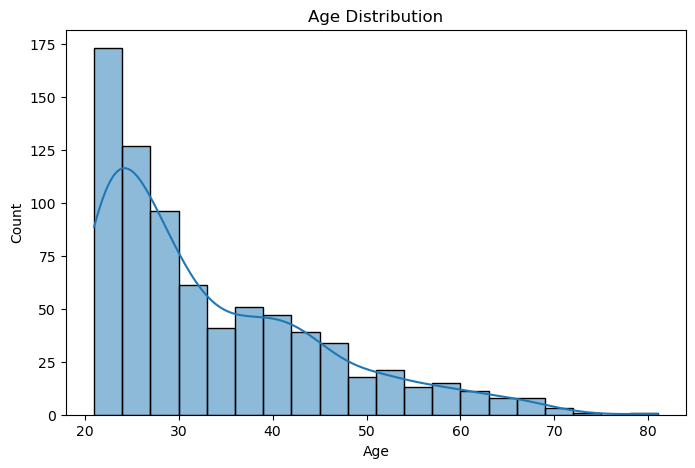

In [10]:
plt.figure(figsize=(8,5))

sns.histplot(x=df['Age'], kde=True, bins=20)

plt.title("Age Distribution")
plt.show()

#### Histogram of Bmi

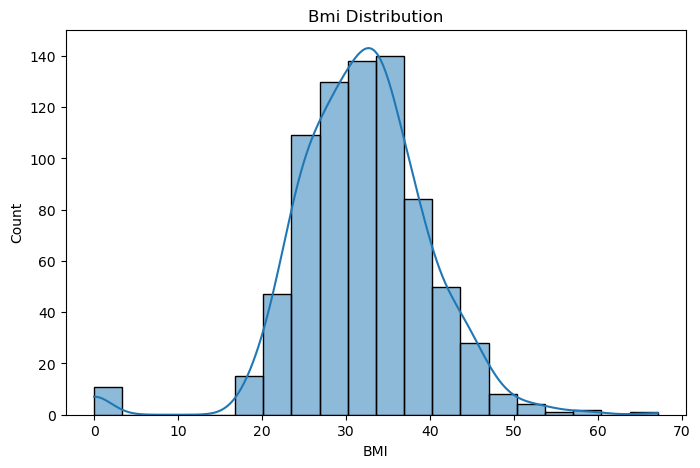

In [11]:
plt.figure(figsize=(8,5))

sns.histplot(x=df['BMI'], kde=True, bins=20)

plt.title("Bmi Distribution")
plt.show()

#### Histogram of Blood Glucose Level

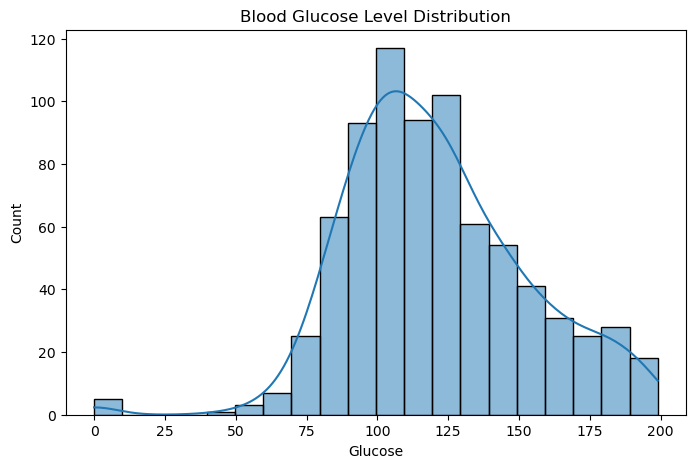

In [12]:
plt.figure(figsize=(8,5))

sns.histplot(x=df['Glucose'], kde=True, bins=20)

plt.title("Blood Glucose Level Distribution")
plt.show()

#### Pieplot of Diabetes

Outcome
non-diabetic    500
diabetes        268
Name: count, dtype: int64


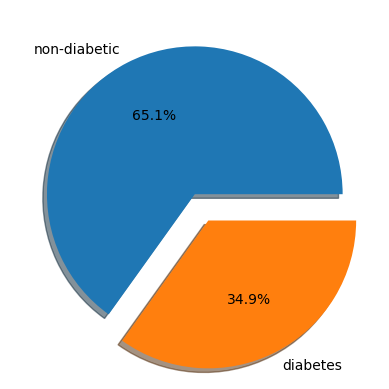

In [13]:
a = df['Outcome'].replace({0: 'non-diabetic', 1: 'diabetes'}).value_counts()
print(a)

plt.pie(a, explode=[0,0.2],labels=['non-diabetic','diabetes'], autopct="%0.1f%%",shadow=True)
plt.show()

## fruchar

#### Split the Data into Features and Target

In [14]:
# Split features (X) and target (y)

X = df.drop('Outcome', axis=1)
Y = df['Outcome']

# Split into train and test sets (80% train, 20% test)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=25)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((614, 8), (154, 8), (614,), (154,))

#### Apply SMOTE

In [15]:
smote = SMOTE()

X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)
X_train_smote.shape, X_test.shape, Y_train_smote.shape, Y_test.shape

((794, 8), (154, 8), (794,), (154,))

#### Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_sts = scaler.fit_transform(X_train_smote)
X_test_sts = scaler.transform(X_test)

## modal tarin

In [195]:
from sklearn.linear_model import LogisticRegression

regression = LogisticRegression(random_state=42)
regression.fit(X_train_sts,Y_train_smote)

LogisticRegression(random_state=42)

In [220]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

Y_pred = regression.predict(X_test_sts)
accuracy_score(Y_test,Y_pred)

0.7727272727272727

In [221]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [222]:
print(regression.predict(scaler.transform([[6,148,72,35,0,33.6,0.62,50]])))
print(regression.predict(scaler.transform([[1,85,66,29,0,26.6,0.35,31]])))

[1]
[0]


In [225]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='gini', random_state=42)
classifier.fit(X_train_sts,Y_train_smote)

DecisionTreeClassifier(random_state=42)

In [226]:
Y_pred = classifier.predict(X_test_sts)

print(accuracy_score(Y_test,Y_pred))

print(regression.predict(scaler.transform([[6,148,72,35,0,33.6,0.62,50]])))
print(regression.predict(scaler.transform([[1,85,66,29,0,26.6,0.35,31]])))

0.7402597402597403
[1]
[0]


In [231]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 40, criterion = 'entropy',random_state=22)
model.fit(X_train_sts, Y_train_smote)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=22)

In [232]:
Y_pred = model.predict(X_test_sts)

print(accuracy_score(Y_test,Y_pred))
print(regression.predict(scaler.transform([[6,148,72,35,0,33.6,0.62,50]])))
print(regression.predict(scaler.transform([[1,85,66,29,0,26.6,0.35,31]])))

0.8051948051948052
[1]
[0]


In [ ]:
# print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

In [234]:
import pickle

with open('diabetes_random_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [233]:
with open('diabetes_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)